In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
heart_df = pd.read_csv("heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Plotting with pandas using the OO method (Object Oriented)

* For more complicated plots, we use the OO method.

* When plotting something quickly, use pyplot method
* When plotting something more advanced, use the OO method 

In [12]:
# Create a dataframe that contains data of all people with age over 50

over_50 = heart_df[heart_df["age"]>50]
# select dataframe, then select column within it

over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
len(over_50) # 208 data

208

### Scatter plot

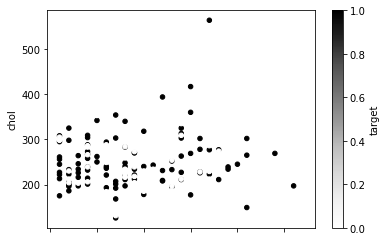

In [14]:
# Scatter plot of age and chol column

# Pyplot method
over_50.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target" # target is a color
); 

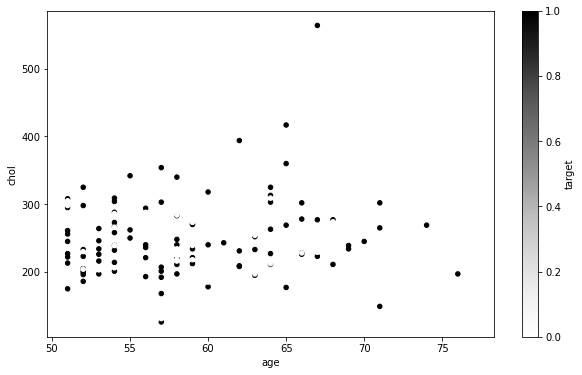

In [15]:
# OO method

# ax is the space where we are plotting
# figure is the entire box

fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target", # change color based on the target column value
    ax=ax
); 

# ax.set_xlim([45,100]) # set range of x-axis

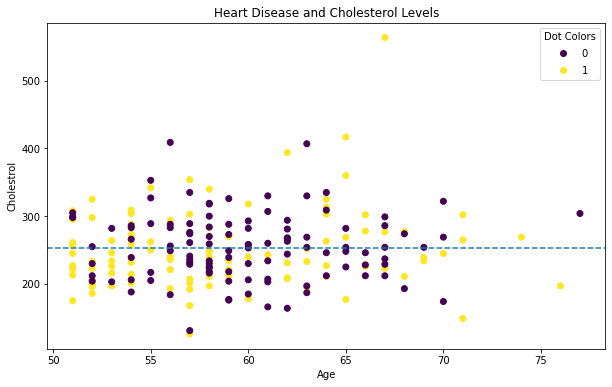

In [19]:
# OO method
fig, ax = plt.subplots(figsize=(10,6))

# ax = Axes in matplotlib plot

# Plot the data
scatter = ax.scatter(
    x=over_50["age"], # select column data for x-axis
    y=over_50["chol"], # select column data for y-axis
    c=over_50["target"] # change color based on the target column value
);

# Customize the plot
ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholestrol"
);

# Add a legend
ax.legend(*scatter.legend_elements(),title="Dot Colors");

# *scatter.legend_elements() = grab the value from scatter and unpack the legend elements which
# will query the c parammeter by looking at the target column, and
# then create a legend field of those elements

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), # y value (axis) needed
            linestyle="--"
        );


## Adding another plot to existing styled one

* Subplot

In [17]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


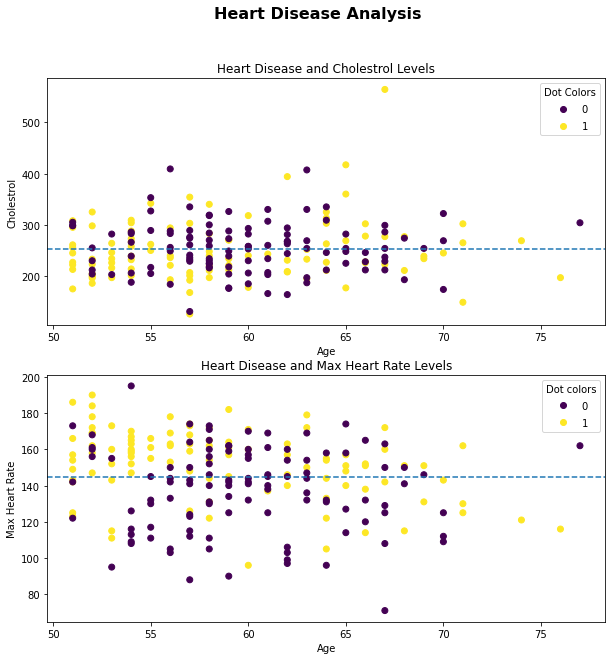

In [22]:
# Subplot of chol, age, thalach -  Scatter Graph of panda dataframe
# chol and thalach on y-axis, age on x-axis (columns of data frame)

# Create a single figure with 2 axis - ax0, ax1 
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
# also, here we can do --> sharex=True which means figure will share the same x-axis
# when ploting subplots, no. of rows and cols must be mentioned

# Add data to ax0 - age and chol
scatter = ax0.scatter(
    x=over_50["age"], # select column data for the axis
    y=over_50["chol"],
    c=over_50["target"] # target data of column
);

# Customize ax0 
ax0.set(
    title="Heart Disease and Cholestrol Levels",
    xlabel="Age",
    ylabel="Cholestrol"
);

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(),title="Dot Colors")

# Add a meanline (horizontal line --> mean())
ax0.axhline(y=over_50["chol"].mean(),linestyle="--");


# ----------------------------------------------------------------

# Add data to ax1 - age and thalach

scatter = ax1.scatter(
    x=over_50["age"], # select column data for the axis
    y=over_50["thalach"],
    c=over_50["target"] # target data of column
);

# Customize ax1 
ax1.set(
    title="Heart Disease and Max Heart Rate Levels",
    xlabel="Age",
    ylabel="Max Heart Rate"
);

# Add a legend to ax0
ax1.legend(*scatter.legend_elements(),title="Dot colors")

# Add a meanline (horizontal line --> mean())
ax1.axhline(y=over_50["thalach"].mean(),linestyle="--");

# -----------------------------------------------------------

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


In [21]:
# --------------------------------------------------------------

### Customizing your plots

* limits (xlim, ylim), colors, styles, legends

In [30]:
sales_df = pd.read_csv("car-sales.csv")

In [31]:
# Convert Price column from object to string 
sales_df["Price"] = sales_df["Price"].str.replace('[\$\,\.]', '')

<ipython-input-31-d701d76f610b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_df["Price"] = sales_df["Price"].str.replace('[\$\,\.]', '')


In [32]:
# Remove the last 2 0s
sales_df["Price"] = sales_df["Price"].str[:-2]

# Convert Price column from string to integer
sales_df["Price"] = sales_df["Price"].astype(int)

In [33]:
sales_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [34]:
## All the different styles available in matplotlib

# Run the following codes below when u start a new notebook
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

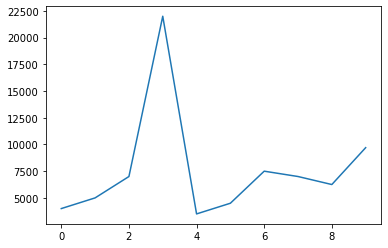

In [35]:
# The default style
sales_df["Price"].plot();

In [36]:
## Update matplotlib's style internally
plt.style.use("seaborn-whitegrid")

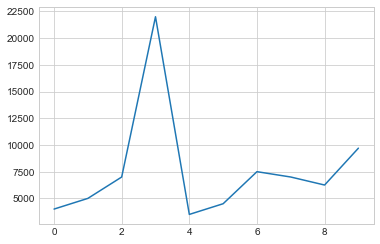

In [37]:
# Style updated, now plot
sales_df["Price"].plot();

In [38]:
plt.style.use("seaborn") # Preferred - come's with titles by default

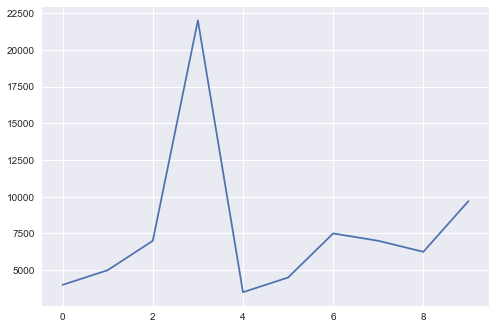

In [39]:
sales_df["Price"].plot();

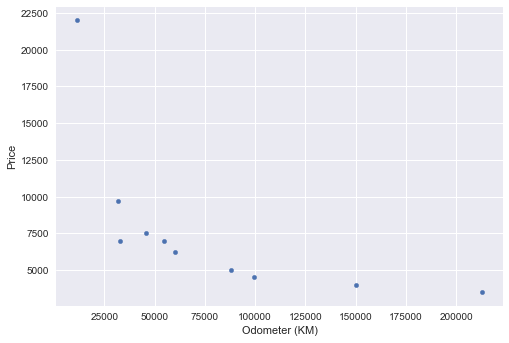

In [41]:
# Try - plot an x and y axis from dataframe column 
sales_df.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [42]:
plt.style.use("ggplot") # for hist, bar

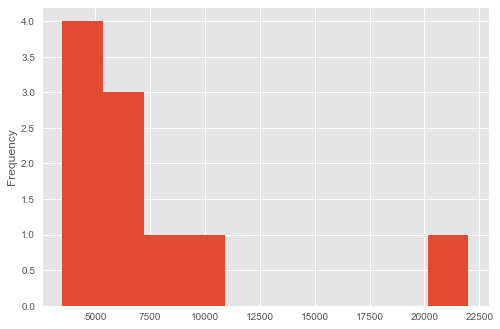

In [43]:
sales_df["Price"].plot.hist();

In [44]:
# Create some dummy data
x = np.random.randn(10,4)
x

array([[ 1.35418484,  0.94032755, -0.90760412, -0.34054964],
       [-1.05248578, -1.0643486 ,  1.49480184,  0.09771556],
       [ 1.38893052,  0.40150323, -2.30898608, -0.48950155],
       [ 0.36167473,  1.31539505, -0.9324746 ,  1.13353124],
       [-0.09805971,  0.3854646 , -0.07010956, -0.10133372],
       [ 0.82270644, -0.45374692, -0.18256177,  1.19806156],
       [-0.81874802, -1.24359373, -1.40765027,  0.30094332],
       [-1.12731428,  1.19398312, -2.22951525,  1.11362303],
       [-0.5060154 ,  1.30102216,  0.2166041 ,  0.20446741],
       [ 1.00546396, -0.28263152, -1.08770054,  0.83438558]])

In [45]:
df = pd.DataFrame(x,columns=["a","b","c","d"])
df

,a,b,c,d
0,1.354185,0.940328,-0.907604,-0.340550
1,-1.052486,-1.064349,1.494802,0.097716
2,1.388931,0.401503,-2.308986,-0.489502
3,0.361675,1.315395,-0.932475,1.133531
4,-0.098060,0.385465,-0.070110,-0.101334
5,0.822706,-0.453747,-0.182562,1.198062
6,-0.818748,-1.243594,-1.407650,0.300943
7,-1.127314,1.193983,-2.229515,1.113623
8,-0.506015,1.301022,0.216604,0.204467
9,1.005464,-0.282632,-1.087701,0.834386


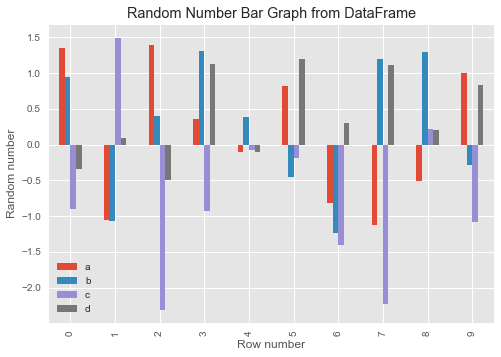

In [48]:
# axis - pyplot (for quick plotting)
ax = df.plot(kind="bar");

# Customize the plot with the set method
ax.set(
    title="Random Number Bar Graph from DataFrame", 
    xlabel="Row number", 
    ylabel="Random number"
);

# Make the legends visible
ax.legend().set_visible(True)


### Change a style from within another style - cmap

In [52]:
plt.style.use('seaborn-whitegrid')

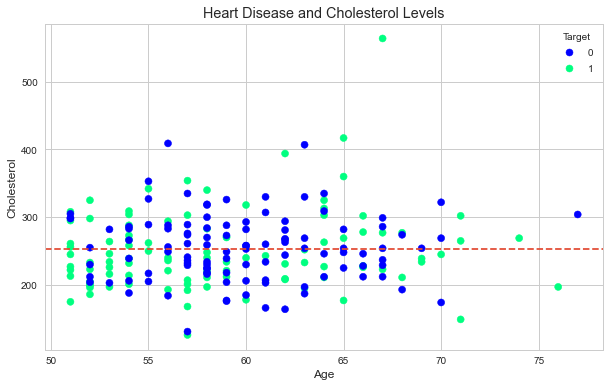

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    over_50["age"], 
    over_50["chol"], 
    c=over_50["target"],
    cmap="winter" # this changes the colour scheme
); # check out the color maps of matplotlib plot

ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholesterol");

ax.axhline(y=over_50["chol"].mean(), 
           linestyle='--', 
           label="Average");

ax.legend(*scatter.legend_elements(), title="Target");

### Customizing the plots - using the same examples above

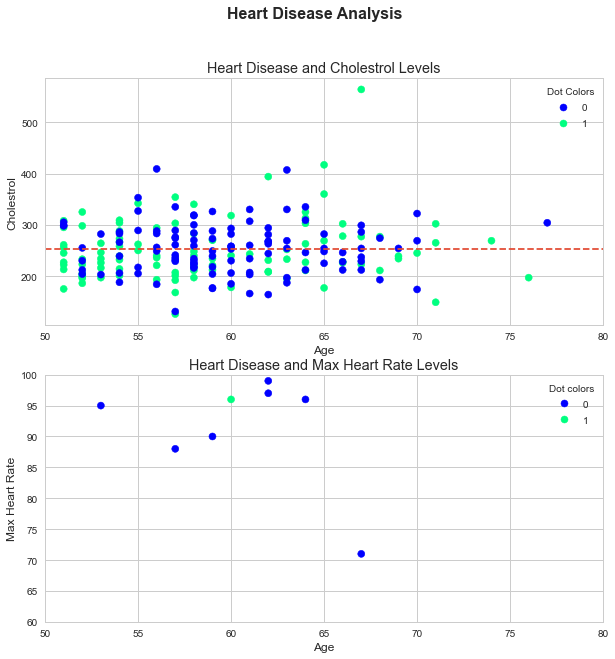

In [61]:
# Subplot of chol, age, thalach -  Scatter Graph of panda dataframe
# chol and thalach on y-axis, age on x-axis (columns of data frame)

# Create a single figure with 2 axis - ax0, ax1 
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
# also, here we can do --> sharex=True which means figure will share
# the same x-axis

# Add data to ax0 - age and chol
scatter = ax0.scatter(
    x=over_50["age"], # select column data for the axis
    y=over_50["chol"],
    c=over_50["target"], # target data of column
    cmap="winter"
);

# Customize ax0 
ax0.set(
    title="Heart Disease and Cholestrol Levels",
    xlabel="Age",
    ylabel="Cholestrol"
);

# Change the x-axis limits
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(),title="Dot Colors")

# Add a meanline (horizontal line --> mean())
ax0.axhline(y=over_50["chol"].mean(),linestyle="--");


# ----------------------------------------------------------------

# Add data to ax1 - age and thalach

scatter = ax1.scatter(
    x=over_50["age"], # select column data for the axis
    y=over_50["thalach"],
    c=over_50["target"], # target data of column
    cmap="winter"
);

# Customize ax1 
ax1.set(
    title="Heart Disease and Max Heart Rate Levels",
    xlabel="Age",
    ylabel="Max Heart Rate",
);

# Change the x-axis limits
ax1.set_xlim([50,80])
# Change the y-axis limits
ax1.set_ylim([60,100])

# Add a legend to ax0
ax1.legend(*scatter.legend_elements(),title="Dot colors")

# Add a meanline (horizontal line --> mean())
ax1.axhline(y=over_50["thalach"].mean(),linestyle="--");

# -----------------------------------------------------------

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

# Save the plot 
fig.savefig("heart-disease-analysis-plot.png")


### Saving plots

* Saving plots to images using figsave()

If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

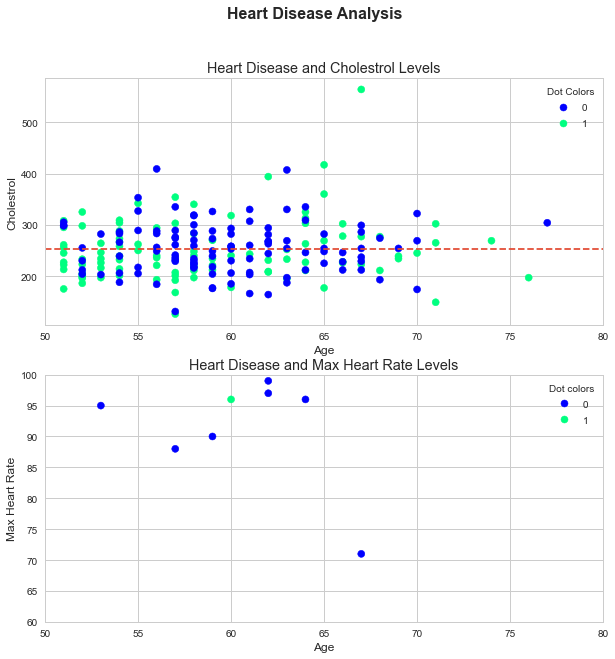

In [62]:
# display the figure
fig

In [63]:
# Check the supported filetypes - to save
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### Potential Function

In [ ]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot